# L2 Regularized Logistic Regression Model

This demo file provides an example of using my L2 Regularized Logistic Regression model built with numpy to classify some simple, simulated data.

- **Author:** Joel Stremmel (jstremme@uw.edu)
- **Credits:** University of Washington DATA 558 with Zaid Harchaoui and Corinne Jones

### Standard Imports

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_fscore_support as score

### Import Methods for Modeling Training and Analysis

In [2]:
from l2_regularized_logistic_regression import *

### Generate Some Simulated Data and Targets with Signal and Noise

In [3]:
x1 = 5 * np.ones(shape=(50, 80)) + np.random.normal(size=(50, 80))
x2 = 2 * np.ones(shape=(50, 80)) + np.random.normal(size=(50, 80))

mu1, sd1 = np.mean(x1), np.std(x1)
mu2, sd2 = np.mean(x2), np.std(x2)

print("x1 mean: {}, x1 sd: {}".format(mu1, sd1))
print("x2 mean: {}, x2 sd: {}".format(mu2, sd2))

x1 mean: 5.011148067568902, x1 sd: 0.9969531724556675
x2 mean: 2.0104214753322958, x2 sd: 0.9731896374278008


In [4]:
X = np.concatenate((x1, x2), axis=0)
y = np.concatenate((np.ones(50), np.ones(50) * -1), axis=0)

### Train Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, shuffle=True)

### Scale Input Data and Transform Binary Targets to [-1, 1]

In [6]:
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)
y_train = transform_target(y_train)
y_test = transform_target(y_test)

### Train L2 Regularized Logistic Regression

In [7]:
beta_vals = l2_log_reg(X_train, y_train, lambda_penalty=1.0, eps=0.001, v=0)

### Visualize Value of Object from Each Iteration of Gradient Descent

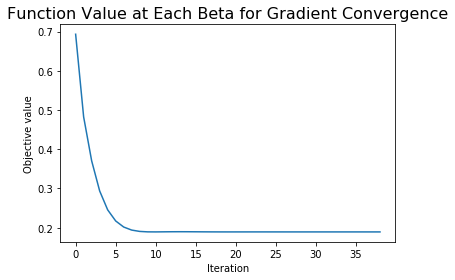

In [8]:
plot_objective_values(X_train, y_train, beta_vals, lambda_penalty=1.0)

### Predict with Each Coefficient Vector on Train and Test

In [9]:
train_pred_vals = predict_all(beta_vals, X_train)
test_pred_vals = predict_all(beta_vals, X_test)

### Visualize Misclassification Error at Each Step of Gradient Descent

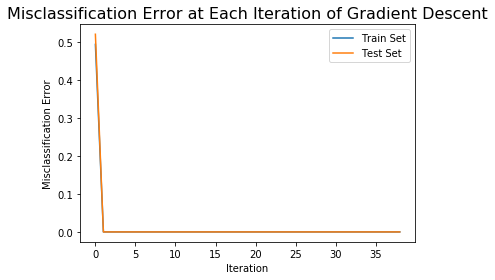

In [10]:
plot_errors(train_pred_vals, test_pred_vals, y_train, y_test, labels=['Train Set', 'Test Set'])

### Use K Fold Cross Validation to Find the Optimal Lambda Value

In [11]:
lambdas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
mean_test_errors = k_fold_crossval(X_train, y_train, lambdas, k=3, eps=0.001)

Lambda=0.001 mean misclassification error on test sets: 0.0
Lambda=0.01 mean misclassification error on test sets: 0.0
Lambda=0.1 mean misclassification error on test sets: 0.0
Lambda=1 mean misclassification error on test sets: 0.0
Lambda=10 mean misclassification error on test sets: 0.0
Lambda=100 mean misclassification error on test sets: 0.0
Lambda=1000 mean misclassification error on test sets: 0.0


In [12]:
best_lambda = lambdas[np.argmin(mean_test_errors)]
print('Best lambda: {}'.format(best_lambda))

Best lambda: 0.001


### Retrain L2 Regularized Logistic Regression with Optimal Lambda

In [13]:
beta_vals = l2_log_reg(X_train, y_train, lambda_penalty=best_lambda, eps=0.001, v=0)

### Predict with Each Coefficient Vector on Train and Test

In [14]:
train_pred_vals = predict_all(beta_vals, X_train)
test_pred_vals = predict_all(beta_vals, X_test)

### Visualize Misclassification Error at Each Step of Gradient Descent

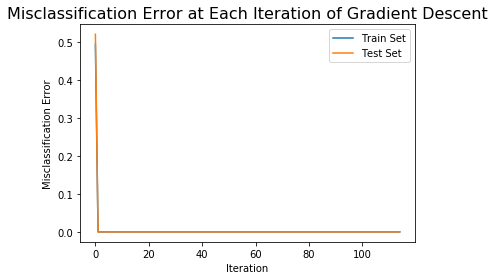

In [15]:
plot_errors(train_pred_vals, test_pred_vals, y_train, y_test, labels=['Train Set', 'Test Set'])

### Calculate Precision and Recall with the Final Beta from Training

In [16]:
train_precision, train_recall, train_fscore, train_support = score(y_train, train_pred_vals[-1])
val_precision, val_recall, val_fscore, val_support = score(y_test, test_pred_vals[-1])

pr_df = pd.DataFrame({'Class': list(range(0, 2)),
                      'TrainPrecision': train_precision,
                      'TrainRecall': train_recall,
                      'ValidationPrecision': val_precision,
                      'ValidationRecall': val_recall})
pr_df

,Class,TrainPrecision,TrainRecall,ValidationPrecision,ValidationRecall
0,0,1.0,1.0,1.0,1.0
1,1,1.0,1.0,1.0,1.0
